In [ ]:
#!pip install fosforml snowflake  snowflake-connector-python snowflake-snowpark-python snowflake-snowpark-python[pandas] seaborn matplotlib numpy pandas scikit-learn refractio refractml refractio[snowflake]

In [1]:
pip freeze

absl-py==1.4.0
aiobotocore==2.15.0
aiohappyeyeballs==2.4.0
aiohttp==3.10.5
aioitertools==0.12.0
aiosignal==1.3.1
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
asn1crypto==1.5.1
asttokens==2.4.1
async-lru==2.0.4
async-timeout==4.0.3
attrs==23.2.0
Babel==2.15.0
beautifulsoup4==4.12.3
bleach==6.1.0
botocore==1.35.16
Brotli==1.0.9
cachetools==5.5.0
catboost==1.2.7
certifi==2024.7.4
cffi==1.16.0
charset-normalizer==3.3.2
cloudpickle==2.2.1
comm==0.2.2
conda==23.1.0
conda-content-trust==0.1.3
conda-package-handling==2.3.0
conda-package-streaming==0.10.0
contourpy==1.3.0
cryptography==42.0.5
cycler==0.12.1
debugpy==1.8.2
decorator==5.1.1
defusedxml==0.7.1
exceptiongroup==1.2.2
executing==2.0.1
fastjsonschema==2.20.0
filelock==3.16.1
fonttools==4.53.1
fosforml==1.1.7
frozenlist==1.4.1
fsspec==2023.12.2
graphviz==0.20.3
h11==0.14.0
httpcore==1.0.5
httpx==0.27.0
idna==3.7
importlib-metadata==8.2.0
importlib-resources==6.4.5
ipykernel==6.29.5
ipython==8.18.1
ipywidgets==8.1.3
jedi

In [ ]:
!pip uninstall -y scikit-learn

In [ ]:
!pip install fosforml
!pip install 'scikit-learn==1.5.1'

In [2]:
from fosforml.model_manager.snowflakesession import get_session
my_session = get_session()

In [3]:
table_name = 'SALARY_DATA'
sf_df = my_session.sql("select * from {}".format(table_name))
salaryDataset =  sf_df.to_pandas()
salaryDataset

,YEARSEXPERIENCE,SALARY
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
X = salaryDataset[["YEARSEXPERIENCE"]]
y = salaryDataset[["SALARY"]]

In [5]:
#from sklearn.preprocessing import train_test_split
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
#help(sklearn.model_selection.train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
#help(model)

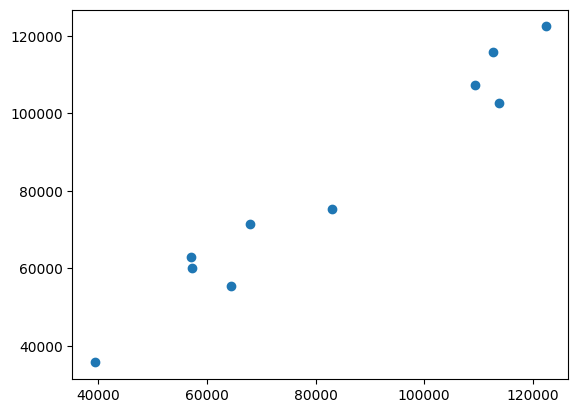

In [7]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred)
plt.show()

In [8]:
from fosforml import register_model

In [9]:
import pandas as pd
y_pred_df = pd.DataFrame(y_pred , columns = ['salary_pred'])

In [ ]:
register_model(
  model_obj=model,
  session=my_session,
  x_train=X_train,
  y_train=y_train,
  x_test=X_test,
  y_test=y_test,
  y_pred=y_pred_df,
  source="Notebook",
  dataset_name="SALARY_DATA",
  dataset_source="Snowflake",
  name="Salary_Prediction",
  description="This model is to predict the salary based on experinece",
  flavour="sklearn",
  model_type="regression",
  #conda_dependencies=["scikit-learn==1.5.2"]
)

Got error object of type 'NoneType' has no len() when trying to read default values from function: <function explained_variance_score.<locals>.explained_variance_score_anon_sproc at 0x7f19f927aa60>. Proceeding without creating optional arguments


Calculating build time metrics

Progress: ██████████████████                                                     25.0%


The version of package 'snowflake-snowpark-python' in the local environment is 1.22.1, which does not fit the criteria for the requirement 'snowflake-snowpark-python'. Your UDF might not work when the package version is different between the server and your local environment.


In [ ]:
# from snowflake.ml.registry import Registry

# registry = Registry(session=session, database_name=current_db, schema_name=current_schema)
# registry.log_model(
#     model_name="Salary_Prediction_Model",
#     model=model,
#     version_name = "V1",
#     comment="A simple linear regression model",
#     sample_input_data = [[5.2]]
# )
# #help(Registry.log_model)

In [ ]:
# Install snowflake-ml-python
from snowflake.ml.registry import registry

reg = registry.Registry(session=my_session, database_name='AMAZON_DB', schema_name='AMAZON_SCHEMA')
mv = reg.get_model("SALARY_PREDICTION_MODEL").version('V1')
mv.run([[10.2]], function_name='PREDICT')